<h1>Aprendizado não Supervisionado</h1><br>
Esse notebook busca apresentar uma aplicação de algoritmos de <b>aprendizado não supervisionado</b> para agrupar filmes pelo seu genero, são usados algoritmos de cluterização para desempenhar tal tarefa.<br> 
O <b><a href="https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1">Kmeans</a></b> é principal algoritmo usado para fazer o agrupamento neste notebook, é usados outros algoritmos para visualização dos agrupamento.

<h3>Importando bibliotecas e pacotes que serão usadas</h3>

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage

A neccessidade de criar uma variavel <b>url</b> é uma prática que facilita a escrita do código e caso precisar mudar a `url` não há necessidade de fazer está tarefa por todos o lugar que se usa a mesma.<br>
Trocar os nomes das colunas para nomes que é de fácil identificação é uma boa prática.

In [3]:
url = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
filmes = pd.read_csv(url)
filmes.columns =['filmes_id', 'titulo', 'genero']
filmes.head()

,filmes_id,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
filmes.genero.head(10)

0    Adventure|Animation|Children|Comedy|Fantasy
1                     Adventure|Children|Fantasy
2                                 Comedy|Romance
3                           Comedy|Drama|Romance
4                                         Comedy
5                          Action|Crime|Thriller
6                                 Comedy|Romance
7                             Adventure|Children
8                                         Action
9                      Action|Adventure|Thriller
Name: genero, dtype: object

A coluna que contém os generos é uma variavél em formato categórica, e o Kmeans é um algoritmo que não processa variavel categórica. 
O sucesso do algoritmo depende de transformar os rótulo da coluna genero em 0 ou 1.<br>
Usar o método dummies do pandas para transformar os rótulos em variaveis binárias.
<br>`get_dummies()`

In [5]:
generos=filmes.genero.str.get_dummies()
dados_filmes=pd.concat([filmes,generos],axis=1)

In [6]:
dados_filmes.head()

,filmes_id,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


O `KMeans()` é  um algoritmo que precisa que os dados esteja dentro de uma mesma escala. Existem duas técnicas super populares a <b>`Normalização`</b>  (Normalization) e a <b>`Padronização`</b><br>
<ul>
    <li>A <b>normalização</b> escalona cada variável de entrada separadamente para um valor de ponto flutuante em uma faixa de 0-1, que é a faixa  onde o algoritmo consegue uma precisão maior.</li>
    <li>A <b>padronização</b> pressupõe que os dados se ajustem a uma distribuição gaussiana (curva do sino)  redimensionamento a distribuição de valores para que a média dos dados seja 0 e o desvio padrão seja 1</li>
</ul>

In [7]:
scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

Para criar os grupos deve-se usar o método do cotovelo (do inglês Elbow Method),  a ideia é rodar o KMeans para vários quantidades diferentes de clusters e dizer qual dessas quantidades é o número ótimo de clusters.
fonte:https://medium.com/pizzadedados/kmeans-e-metodo-do-cotovelo-94ded9fdf3a9#:~:text=O%20M%C3%A9todo%20do%20Cotovelo&text=Como%20o%20KMeans%20calcula%20a,dist%C3%A2ncia%20seja%20a%20menor%20vi%C3%A1vel.


In [8]:
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]

In [9]:
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]


In [10]:
resultado = pd.DataFrame(resultado, 
            columns=['grupos', 'inertia'])

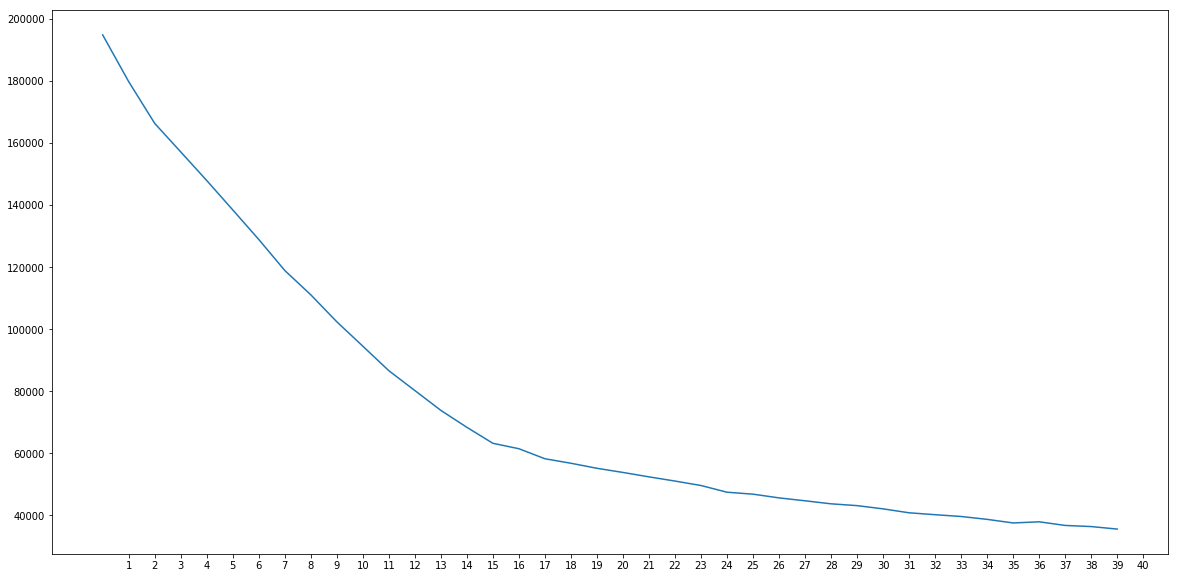

In [16]:
plt.figure(figsize=(20,10))
resultado.inertia.plot(xticks=resultado.grupos)

Percebe que entre 15 e 17 há uma diferença no gráfico ele começa mudar o decaimento, vamos agrupar nossos filmes em 17 grupos.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020FD3C97B00>,
      dtype=object)

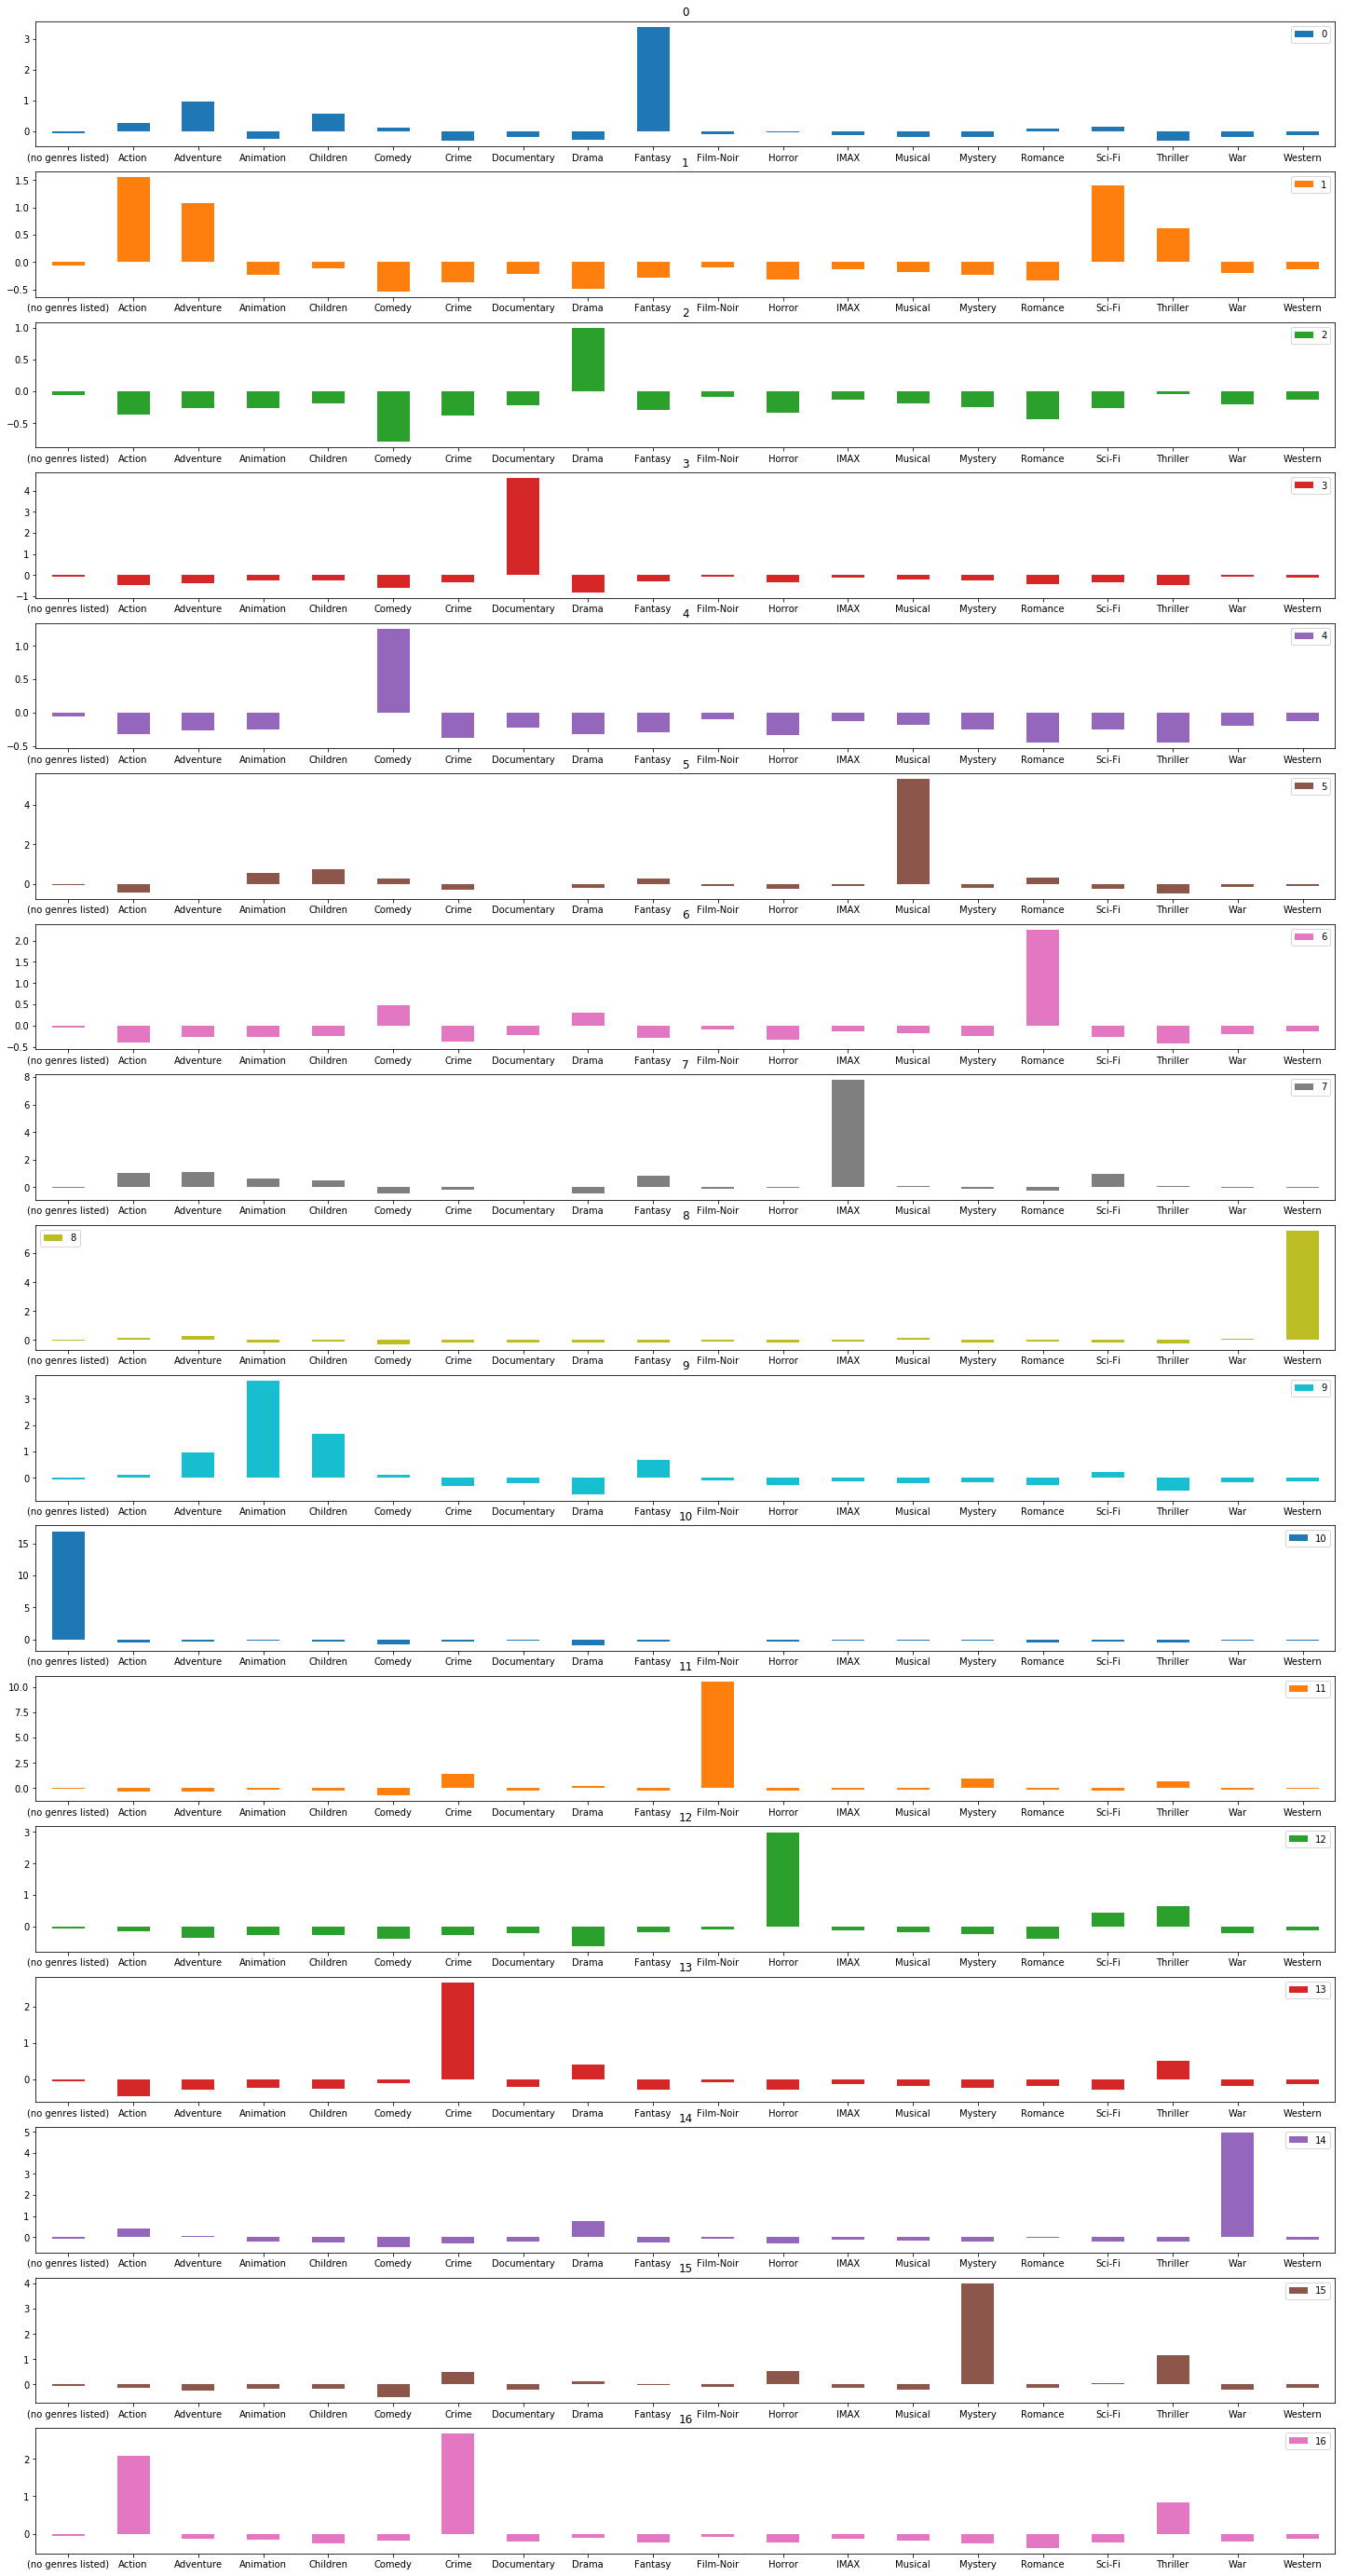

In [17]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

Vamos criar um filtro para visualizar como está os cluster.

In [18]:
grupo = 16

filtro = modelo.labels_ == grupo

filmes[filtro].sample(10)

,filmes_id,titulo,genero
6263,47254,Chaos (2005),Action|Crime|Drama|Thriller
288,330,Tales from the Hood (1995),Action|Crime|Horror
2772,3710,Action Jackson (1988),Action|Comedy|Crime|Thriller
8276,105585,Machete Kills (Machete 2) (2013),Action|Crime|Thriller
4726,7048,Nothing to Lose (1997),Action|Adventure|Comedy|Crime
7044,69131,Killshot (2008),Action|Crime|Drama|Thriller
5498,26375,Silver Streak (1976),Action|Comedy|Crime
7242,73876,Undisputed II: Last Man Standing (2006),Action|Crime|Drama
9216,151781,Ghost in the Shell: Solid State Society (2006),Action|Animation|Crime|Sci-Fi|Thriller
6198,45183,"Protector, The (a.k.a. Warrior King) (Tom yum ...",Action|Comedy|Crime|Thriller


O dendograma para visualizar o processo de clusterização passo a passo, assim como analisar os níveis de distância dos clusters formados. Um bom ponto de decisão da clusterização final é onde os valores de distância mudam consideravelmente.

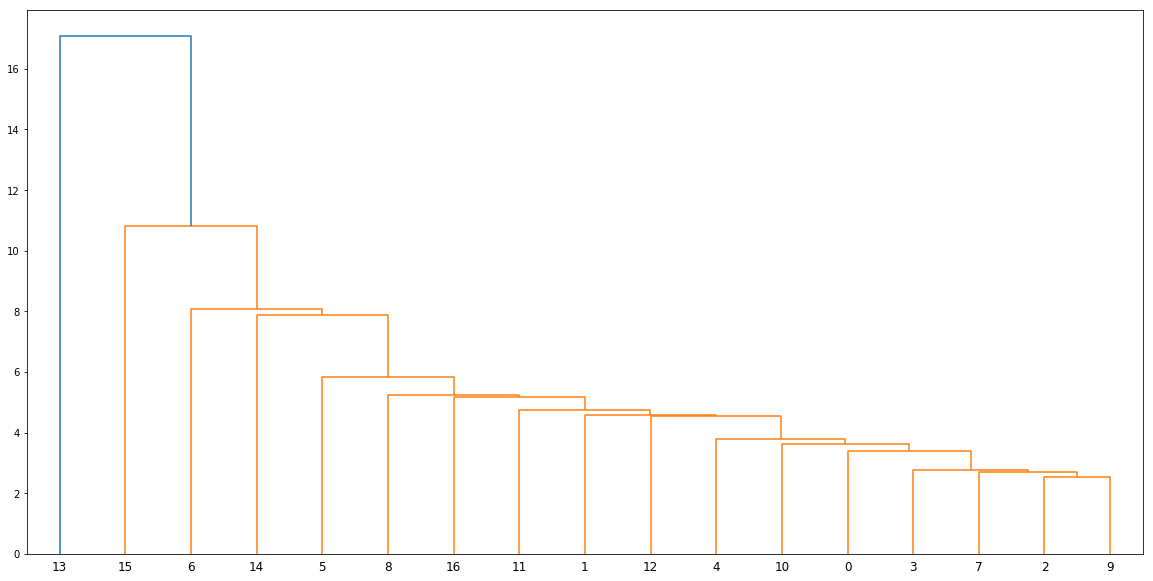

In [32]:
plt.figure(figsize=(20,10))
matriz_de_distancia = linkage(grupos)

dendrograma = dendrogram(matriz_de_distancia)